## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results_df, mouse_metadata_df, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Drop any duplicate rows
duplicate_data = combined_data.loc[combined_data["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Recheck the number of mice
new_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
#clean_study_data_complete.head()
print(len(new_mouse_data["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
mean = new_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = new_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = new_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdv = new_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
StdErr = new_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary = pd.DataFrame({"Mean Tumor Volume":mean,
                        "Median Tumor VOlume":median,
                       "Tumor Volume Variance":variance,
                       "Tumor Volume Std. Dev.":stdv,
                       "Tumor Volume Std. Err.":StdErr})
summary

,Mean Tumor Volume,Median Tumor VOlume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

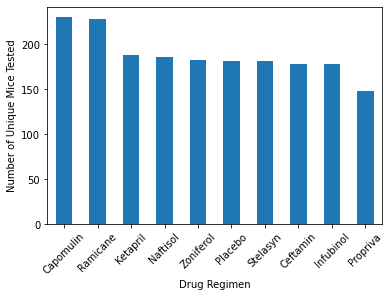

In [10]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_regimen = new_mouse_data["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation=45)
plt.show()

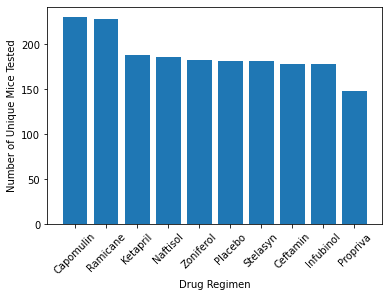

In [11]:
# Generate identical bar plot using pyplot instead of pandas.
drug_regimen = new_mouse_data["Drug Regimen"].value_counts()
plt.bar(drug_regimen.index.values,drug_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation=45)
plt.show()

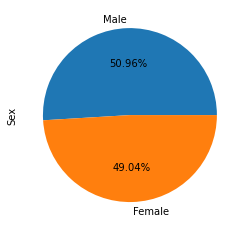

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = new_mouse_data.Sex.value_counts()
gender.plot(kind="pie",autopct="%2.2f%%")
plt.show()

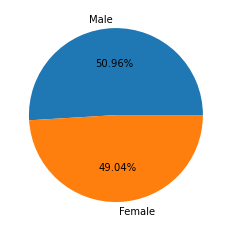

In [19]:
# Generate identical pie plot using pyplot
gender = new_mouse_data.Sex.value_counts()
plt.pie(gender.values,labels=gender.index.values,autopct="%2.2f%%")
#gender.plot(kind="pie",autopct="%2.2f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = new_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = greatest_tumor.merge(new_mouse_data,on=["Mouse ID","Timepoint"],how="left")

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [30]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == drug_regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print("The potential outliers for "+str(drug_regimen)+ "are: " + str(outliers))

The potential outliers for Capomulinare: Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Ramicaneare: Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Infubinolare: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The potential outliers for Ceftaminare: Series([], Name: Tumor Volume (mm3), dtype: float64)


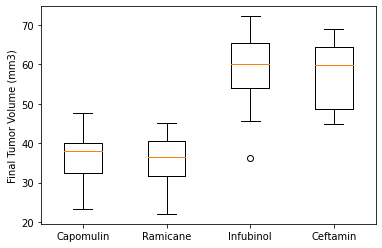

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
plt.boxplot(tumor_vol_data, labels= treatment)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for mouse j246')

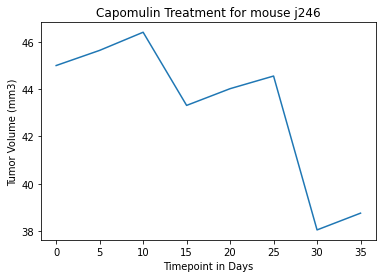

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
cap_mouse = new_mouse_data.loc[new_mouse_data["Drug Regimen"] == "Capomulin"]
#cap_mouse
single_mouse = cap_mouse.loc[cap_mouse["Mouse ID"] == "j246"]
plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse j246")

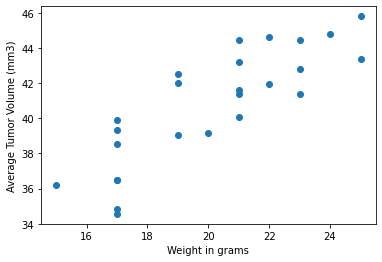

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cap_regimen = new_mouse_data.loc[new_mouse_data["Drug Regimen"] == "Capomulin"]
cap_avg = cap_regimen.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])[0],2)
print("The correlation is: " + str(correlation))

The correlation is: 0.84


# Observations and Insights